<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pre-processing-and-Training-Data" data-toc-modified-id="Pre-processing-and-Training-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pre-processing and Training Data</a></span></li><li><span><a href="#Import-libraries-and-load-the-data" data-toc-modified-id="Import-libraries-and-load-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import libraries and load the data</a></span></li><li><span><a href="#Logistic-Regression-Model" data-toc-modified-id="Logistic-Regression-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Logistic Regression Model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Train-and-Test-Data-Splits" data-toc-modified-id="Train-and-Test-Data-Splits-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Train and Test Data Splits</a></span></li><li><span><a href="#Hyperparameter-search-using-GridSearchCV" data-toc-modified-id="Hyperparameter-search-using-GridSearchCV-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Hyperparameter search using GridSearchCV</a></span></li><li><span><a href="#Assess-model-performance" data-toc-modified-id="Assess-model-performance-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Assess model performance</a></span></li></ul></li></ul></li><li><span><a href="#Random-Forests-Model" data-toc-modified-id="Random-Forests-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random Forests Model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Hyperparameter-search-using-GridSearchCV" data-toc-modified-id="Hyperparameter-search-using-GridSearchCV-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Hyperparameter search using GridSearchCV</a></span></li><li><span><a href="#Assess-model-performance" data-toc-modified-id="Assess-model-performance-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Assess model performance</a></span></li></ul></li></ul></li><li><span><a href="#K-Nearest-Neighbor-(KNN)-Model" data-toc-modified-id="K-Nearest-Neighbor-(KNN)-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>K Nearest Neighbor (KNN) Model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Hyperparameter-search-using-GridSearchCV" data-toc-modified-id="Hyperparameter-search-using-GridSearchCV-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Hyperparameter search using GridSearchCV</a></span></li><li><span><a href="#Assess-model-performance" data-toc-modified-id="Assess-model-performance-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Assess model performance</a></span></li></ul></li></ul></li><li><span><a href="#Gradient-Boosting-Model" data-toc-modified-id="Gradient-Boosting-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Gradient Boosting Model</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Selection</a></span></li></ul></div>

In [1]:
# https://www.kaggle.com/wltjd54/continuous-vs-categorical-for-classification

## Pre-processing and Training Data

## Import libraries and load the data

In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

from library.sb_utils import save_file
%matplotlib inline
sns.set_style('whitegrid') 
# plt.style.use('ggplot')

In [3]:
df = pd.read_csv('./Data/02_EDA.csv')
df.head()

,ID,Income,Age,Children,Days_Enrolled,TotalExpenses,TotalAcceptedCmp5,TotalNumPurchases,Education,Marital_Status,AcceptedCmp6
0,5524,58138.0,58,0,997,1617,0,25,Undergrad,single,1
1,2174,46344.0,61,2,151,27,0,6,Undergrad,single,0
2,4141,71613.0,50,0,498,776,0,21,Undergrad,couple,0
3,6182,26646.0,31,1,91,53,0,8,Undergrad,couple,0
4,5324,58293.0,34,1,347,422,0,19,Postgrad,couple,0


In [4]:
print(df.shape)
df.info()

(2152, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152 entries, 0 to 2151
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2152 non-null   int64  
 1   Income             2152 non-null   float64
 2   Age                2152 non-null   int64  
 3   Children           2152 non-null   int64  
 4   Days_Enrolled      2152 non-null   int64  
 5   TotalExpenses      2152 non-null   int64  
 6   TotalAcceptedCmp5  2152 non-null   int64  
 7   TotalNumPurchases  2152 non-null   int64  
 8   Education          2152 non-null   object 
 9   Marital_Status     2152 non-null   object 
 10  AcceptedCmp6       2152 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 185.1+ KB


In [5]:
# Get a list of categorical variables
s = (df.dtypes == 'object')
cat_features = list(s[s].index)
print("Categorical variables in the dataset:", cat_features)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [6]:
# labeling encoding the categorical features
for cat in cat_features:
    label = LabelEncoder()
    df[cat] = label.fit_transform(df[cat])

df.head()

,ID,Income,Age,Children,Days_Enrolled,TotalExpenses,TotalAcceptedCmp5,TotalNumPurchases,Education,Marital_Status,AcceptedCmp6
0,5524,58138.0,58,0,997,1617,0,25,1,1,1
1,2174,46344.0,61,2,151,27,0,6,1,1,0
2,4141,71613.0,50,0,498,776,0,21,1,0,0
3,6182,26646.0,31,1,91,53,0,8,1,0,0
4,5324,58293.0,34,1,347,422,0,19,0,0,0


## Logistic Regression Model

#### Train and Test Data Splits

In [7]:
X = df.drop(['ID', 'AcceptedCmp6'], axis=1)
y = df['AcceptedCmp6']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
train_columns = X_train.columns

(1506, 9) (646, 9)


In [9]:
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#
lgr = LogisticRegression()
# Fit the model on the trainng data.
lgr.fit(X_train, y_train)

LogisticRegression()

0.8761609907120743
[[534  13]
 [ 67  32]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       547
           1       0.71      0.32      0.44        99

    accuracy                           0.88       646
   macro avg       0.80      0.65      0.69       646
weighted avg       0.86      0.88      0.86       646



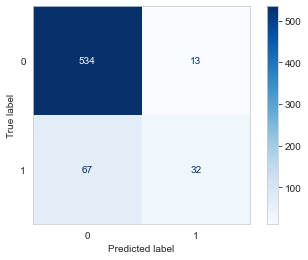

In [10]:
# Print the accuracy from the testing data.
y_pred = lgr.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cf=confusion_matrix(y_test, y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cf).plot(cmap='Blues')
plt.grid(False)
plt.show();

#### Hyperparameter search using GridSearchCV

In [11]:
#the grid of parameters to search over to find the best regularization parameter  𝐶  based *only* on the training set;
# C controls the inverse of the regularization strength. A large C can lead to an overfit model, while a small  can lead to an underfit model.
Cs = [0.001, 0.1, 1, 10, 100]
# Cs = np.logspace(-5, 8, 15)
from sklearn.model_selection import GridSearchCV
param_grid = {'C': Cs}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100]})

In [12]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))   # training accuracy
print("Best estimator is {}".format(logreg_cv.best_estimator_))
print("Best paramter is {}".format(logreg_cv.best_params_))

Tuned Logistic Regression Parameters: {'C': 1}
Best score is 0.8778266704802975
Best estimator is LogisticRegression(C=1)
Best paramter is {'C': 1}


In [13]:
# Predict on the test set and compute metrics
logreg = LogisticRegression(C=1)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
r2 = logreg.score(X_test, y_test)  # test_accuracy
print("Tuned Logistic Regression R squared: {}".format(r2))

Tuned Logistic Regression R squared: 0.8761609907120743


#### Assess model performance

[[534  13]
 [ 67  32]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       547
           1       0.71      0.32      0.44        99

    accuracy                           0.88       646
   macro avg       0.80      0.65      0.69       646
weighted avg       0.86      0.88      0.86       646



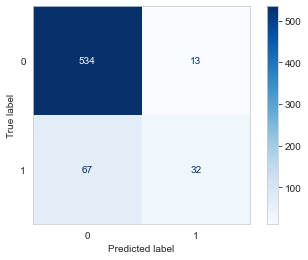

In [14]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cf=confusion_matrix(y_test, y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cf).plot(cmap='Blues')
plt.grid(False)
plt.show();

ROC_AUC: 0.8527690063339058


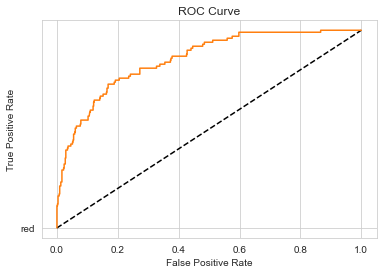

In [15]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("ROC_AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', 'red')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

##  Random Forests Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)

In [17]:
# RF_pipe.get_params().keys():to get a dict of available parameters

In [18]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)
rf_default_cv_results

{'fit_time': array([0.19107676, 0.17070913, 0.17338419, 0.16854692, 0.17752719]),
 'score_time': array([0.01395035, 0.0100069 , 0.01297402, 0.01097298, 0.01133418]),
 'test_score': array([0.85761589, 0.89368771, 0.87375415, 0.87043189, 0.86710963])}

In [19]:
np.mean(rf_default_cv_results['test_score']), np.std(rf_default_cv_results['test_score'])

(0.8725198565488108, 0.011877370050694383)

#### Hyperparameter search using GridSearchCV

In [20]:
# with and without scaler and a number of estimators
n_est =  [25, 50, 75, 100]
grid_params = {
    'standardscaler': [StandardScaler(), None],
    'randomforestclassifier__n_estimators': n_est    
        }
grid_params

{'standardscaler': [StandardScaler(), None],
 'randomforestclassifier__n_estimators': [25, 50, 75, 100]}

In [21]:
#dict for parameters to evaluate, 5-fold cross-validation
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': [25, 50, 75,
                                                                  100],
                         'standardscaler': [StandardScaler(), None]})

In [22]:
print(rf_grid_cv.best_params_)

{'randomforestclassifier__n_estimators': 50, 'standardscaler': None}


In [52]:
# Fit the model based on the best number of estimators.
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

[[530  17]
 [ 58  41]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       547
           1       0.71      0.41      0.52        99

    accuracy                           0.88       646
   macro avg       0.80      0.69      0.73       646
weighted avg       0.87      0.88      0.87       646



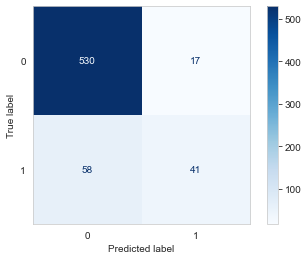

In [53]:
# plot confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cf_2 = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cf_2).plot(cmap='Blues')
plt.grid(False)
plt.show();

ROC_AUC: 0.8312466530016804


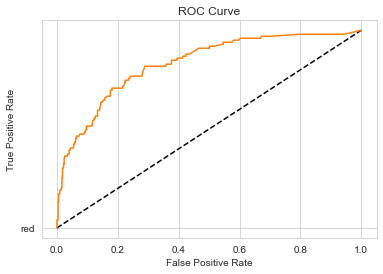

In [25]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("ROC_AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', 'red')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

#### Assess model performance

In [26]:
# 'randomforestclassifier__n_estimators': 42
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_cv_results

{'fit_time': array([0.0868001 , 0.09074235, 0.08881974, 0.08377528, 0.08578634]),
 'score_time': array([0.00699449, 0.00595212, 0.00598431, 0.004987  , 0.00592113]),
 'test_score': array([0.85430464, 0.90033223, 0.87707641, 0.87043189, 0.86046512])}

In [27]:
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.85430464, 0.90033223, 0.87707641, 0.87043189, 0.86046512])

In [28]:
np.mean(rf_best_scores), np.std(rf_best_scores)  # the model is slighly improved upon the default 

(0.8725220567204243, 0.015973482293506352)

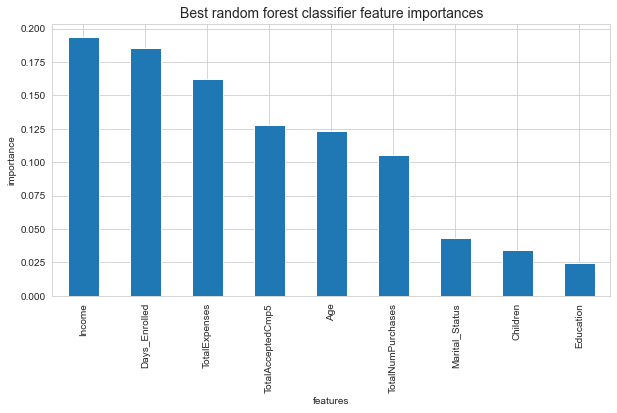

In [29]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=train_columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest classifier feature importances', fontsize=14);

**the dominant top five features are:**
 - 'Income'
 - 'Days_Enrolled'
 - 'TotalExpenses'
 - 'TotalAcceptedCmp5' - total except the last champaign
 - 'Age'    

## K Nearest Neighbor (KNN) Model

In [30]:
# Import the necessary modules
test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    print("train_scores {}: {}".format(i, knn.score(X_train,y_train)))  # Compute and print metrics
    print("test_scores {}: {}".format(i, knn.score(X_test,y_test)))

train_scores 1: 0.9926958831341302
test_scores 1: 0.8374613003095975
train_scores 2: 0.9150066401062417
test_scores 2: 0.8730650154798761
train_scores 3: 0.9116865869853917
test_scores 3: 0.8622291021671826
train_scores 4: 0.8924302788844621
test_scores 4: 0.8668730650154799
train_scores 5: 0.8937583001328021
test_scores 5: 0.8637770897832817
train_scores 6: 0.8811420982735724
test_scores 6: 0.8653250773993808
train_scores 7: 0.8871181938911022
test_scores 7: 0.8668730650154799
train_scores 8: 0.8798140770252324
test_scores 8: 0.871517027863777
train_scores 9: 0.8784860557768924
test_scores 9: 0.8761609907120743


In [31]:
# Identify the number of neighbors that resulted in the max score in the training dataset.
max_score = max(train_scores)
indx = train_scores.index(max_score) + 1    
print('Max train score {} and k = {}'.format(max_score, indx))

Max train score 0.9926958831341302 and k = 1


In [32]:
#Identify the number of neighbors that resulted in the max score in the test dataset.
max_score = max(test_scores)
indx = test_scores.index(max_score) + 1
print('Max test score {} and k = {}'.format(round(max_score), indx))

Max test score 1 and k = 9


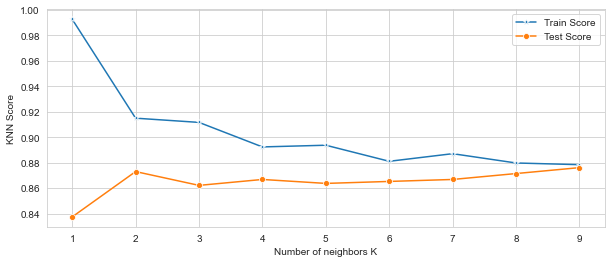

In [33]:
plt.figure(figsize=(10,4))
p = sns.lineplot(x=range(1,10),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,10),y=test_scores,marker='o',label='Test Score')
plt.xlabel('Number of neighbors K')
plt.ylabel('KNN Score')
plt.show();

In [34]:
# Fit and score the best number of neighbors based on the plot.
best_neighbors = 2

knn = KNeighborsClassifier(n_neighbors = best_neighbors)
knn.fit(X_train,y_train)
train_score = knn.score(X_train,y_train)
test_score = knn.score(X_test,y_test)

print('Train score for n=2 neighbors: ', train_score)
print('Test score for n=2 neighbors: ', test_score)

Train score for n=2 neighbors:  0.9150066401062417
Test score for n=2 neighbors:  0.8730650154798761


In [35]:
from sklearn.metrics import confusion_matrix
y_pred2 = knn.predict(X_test)

[[545   2]
 [ 92   7]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       547
           1       0.78      0.07      0.13        99

    accuracy                           0.85       646
   macro avg       0.82      0.53      0.53       646
weighted avg       0.84      0.85      0.80       646



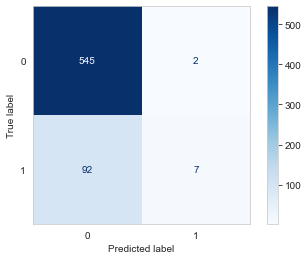

In [36]:
# plot confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay
cf_3 = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cf_3).plot(cmap='Blues')

plt.grid(False)
plt.show();

#### Hyperparameter search using GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,30)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [38]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8718554047215683
Best Parameters: {'n_neighbors': 29}


In [39]:
best_neighbors = 29

knn = KNeighborsClassifier(n_neighbors = best_neighbors)
knn.fit(X_train,y_train)
train_score = knn.score(X_train,y_train)
test_score = knn.score(X_test,y_test)

print('Train score for n=2 neighbors: ', train_score)  # # the model is slighly improved upon the default 
print('Test score for n=2 neighbors: ', test_score)

y_pred = knn.predict(X_test)

Train score for n=2 neighbors:  0.8745019920318725
Test score for n=2 neighbors:  0.8746130030959752


#### Assess model performance

[[543   4]
 [ 77  22]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       547
           1       0.85      0.22      0.35        99

    accuracy                           0.87       646
   macro avg       0.86      0.61      0.64       646
weighted avg       0.87      0.87      0.84       646



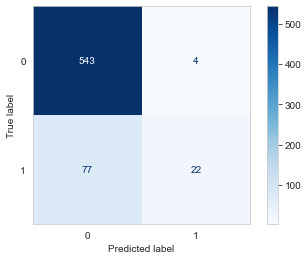

In [40]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cf_3 = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_3)
cmd.plot(cmap='Blues')
plt.grid(False)
plt.show();

ROC_AUC: 0.8194559858179602


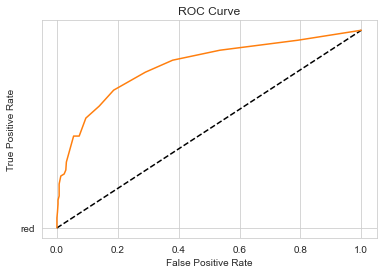

In [41]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("ROC_AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', 'red')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

## Gradient Boosting Model

In [42]:
# test multiple learning rates in the gradient boosting classifier.
learning_rates = [0.05, 0.25, 0.5, 0.75, 1, 1.25]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))

    print()

Learning rate:  0.05
Accuracy score (training): 0.849
Accuracy score (validation): 0.847

Learning rate:  0.25
Accuracy score (training): 0.886
Accuracy score (validation): 0.862

Learning rate:  0.5
Accuracy score (training): 0.896
Accuracy score (validation): 0.859

Learning rate:  0.75
Accuracy score (training): 0.903
Accuracy score (validation): 0.854

Learning rate:  1
Accuracy score (training): 0.904
Accuracy score (validation): 0.842

Learning rate:  1.25
Accuracy score (training): 0.902
Accuracy score (validation): 0.854



In [43]:
# Apply the best learning rate to the model fit and predict on the testing set. 
gbc = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.75, 
                                    max_features=2, max_depth = 2, random_state = 42)
gbc_model = gbc.fit(X_train, y_train)
# predict
y_pred = gbc_model.predict(X_test)

[[528  19]
 [ 66  33]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       547
           1       0.63      0.33      0.44        99

    accuracy                           0.87       646
   macro avg       0.76      0.65      0.68       646
weighted avg       0.85      0.87      0.85       646



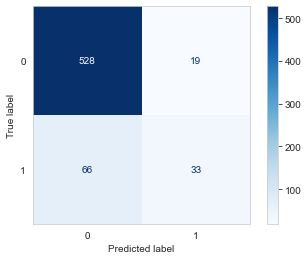

In [44]:
# Print out the confusion matrix and the classification report to review the model performance.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cf_4 = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_4)
cmd.plot(cmap='Blues')
plt.grid(False)
plt.show();

ROC_AUC: 0.8046830277177627


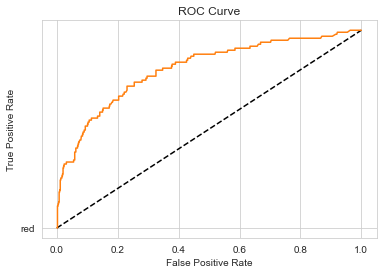

In [45]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = gbc.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("ROC_AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', 'red')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

## Model Selection